In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import interp2d

In [3]:
df1= pd.read_excel('C:\\Users\\lenovo\\Desktop\\prediction_results\\MAJOR1.xlsx')

In [4]:
LAT1=df1['LATITUDE (MIN.)']+df1['LATITUDE (MAX.)']
LON1=df1['LONGITUDE (MIN.)']+df1['LONGITUDE (MAX.)']
N=df1['N']
M=df1['M']

LAT=LAT1/2
LON=LON1/2

In [5]:
df1=pd.DataFrame({'LAT':LAT,'LON':LON,'N':N,'M':M})

In [6]:
def getH(data):
    if (data > 0):
        if (int(data) == data):
            return int(data) - 0.5
        return int(data) + 0.5
    else:
        if (int(data) == data):
            return int(data) + 0.5
        return int(data) - 0.5

#首先按照平均经纬度求的概率的平均值
df1 = pd.DataFrame(df1)
N = df1[['LAT','LON','N']]
N = N.groupby(['LAT','LON']).mean().reset_index()#981
M = df1[['LAT','LON','M']]
M = M.groupby(['LAT','LON']).mean().reset_index()
#然后按照0.5开始划分经纬度


import xlsxwriter as xw
# 创建一个workbook 设置编码
workbook = xw.Workbook('data.xlsx')
# 创建一个worksheet
worksheet = workbook.add_worksheet("sheet1")


#指定打开的文件名
def write(j,data):
    worksheet.write_column(j,data)

write('A2',N['LON'])
write('B2',N['LAT'])
write('C2',N['N'])
write('D2',M['M'])
##############################################################

LONH = []
LATH = []
for i in range(len(N['LON'])):
    LONH.append(getH(N['LON'][i]))
for i in range(len(N['LAT'])):
    LATH.append(getH(N['LAT'][i]))
write('G2',LONH)
write('H2',LATH)

LONH = pd.DataFrame(LONH)
LONH.rename(columns={0:'LON'},inplace=True)
LATH = pd.DataFrame(LATH)
LONH.rename(columns={0:'LAT'},inplace=True)
resN = pd.concat([LONH,LATH,N['N']],axis=1,ignore_index=True)
resM = pd.concat([LONH,LATH,M['M']],axis=1,ignore_index=True)
resN = resN.groupby([0,1]).mean().reset_index()
resM = resM.groupby([0,1]).mean().reset_index()
write('I2',resN[0])
write('J2',resN[1])
write('K2',resN[2])
write('L2',resM[2])

workbook.close()

In [11]:
#data1=pd.read_excel("C:\\Users\\lenovo\\Desktop\\prediction_results\\model.xlsx")
df=pd.read_excel("data.xlsx",usecols=[8,9,10,11])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lenovo\\Desktop\\prediction_results\\model.xlsx'

In [7]:
df.columns=['Lon','Lat','N','M']

In [8]:
data2=df

In [9]:
data2

,Lon,Lat,N,M
0,-176.5,-43.5,0.113462,0.886538
1,-157.5,21.5,0.008184,0.991816
2,-119.5,37.5,0.267822,0.732178
3,-116.5,62.5,0.548583,0.451417
4,-116.5,64.5,0.007299,0.992701
...,...,...,...,...
152,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN


In [10]:
data=pd.concat([data1,data2])

df2=data.drop_duplicates(subset=['Lon','Lat'],keep=False,inplace=False)

In [11]:
result=pd.concat([data1,df2]).drop_duplicates(keep=False)


In [12]:
result.to_excel('TRACE1.xlsx')

In [75]:
lon1=result['Lon']
lat1=result['Lat']
v=result['N']

In [85]:
lon1


586     -176.5
4071    -157.5
10927   -119.5
11492   -116.5
11494   -116.5
         ...  
62471    167.5
62686    168.5
63407    172.5
63772    174.5
64126    176.5
Name: Lon, Length: 123, dtype: float64

In [86]:
lat1

586     -43.5
4071     21.5
10927    37.5
11492    62.5
11494    64.5
         ... 
62471   -78.5
62686   -43.5
63407   -42.5
63772   -37.5
64126   -43.5
Name: Lat, Length: 123, dtype: float64

In [82]:
np.shape(v)

(123,)

In [83]:
np.shape(x)

(123,)

In [84]:
np.shape(y)

(123,)

KeyError: -1

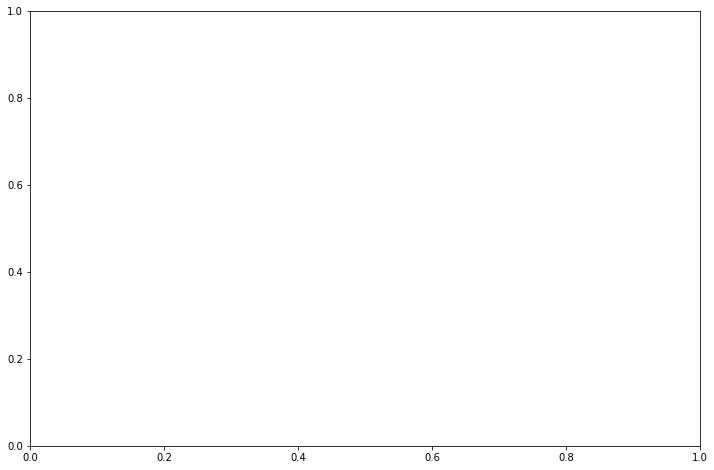

In [81]:
fig1, ax1 = plt.subplots(figsize=(12, 8))
m = Basemap(projection = 'cyl')
nx = 360
ny = 180
x=lon1
y=lat1
mohodat=m.transform_scalar(v,x,y,nx,ny)
im = m.imshow(mohodat,cmap='RdBu')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,30.), labels=[1, 0, 0, 0], fmt="%.1f",fontsize=14)
m.drawmeridians(np.arange(-180.,181.,60.), labels=[0, 0, 0, 1], fmt="%.1f",fontsize=14)
cbar = m.colorbar(im,location='right',pad="5%")
cbar.set_label('Depth (km)')
ax1.tick_params(axis='both', which='major', labelsize=14)
plt.title('Moho depth')
figname='Moho.png'
plt.savefig(figname,bbox_inches='tight',dpi=150)
#plt.close()
plt.show()

In [ ]:
C = C.groupby(['LAT','LON']).mean().reset_index()
S = df1[['LAT','LON','S']]
S = S.groupby(['LAT','LON']).mean().reset_index()
#然后按照0.5开始划分经纬度


import xlsxwriter as xw
# 创建一个workbook 设置编码
workbook = xw.Workbook('data.xlsx')
# 创建一个worksheet
worksheet = workbook.add_worksheet("sheet1")


#指定打开的文件名
def write(j,data):
    worksheet.write_column(j,data)

write('A2',N['LON'])
write('B2',N['LAT'])
write('C2',N['N'])
write('D2',C['C'])
write('E2',S['S'])
##############################################################

LONH = []
LATH = []
for i in range(len(N['LON'])):
    LONH.append(getH(N['LON'][i]))
for i in range(len(N['LAT'])):
    LATH.append(getH(N['LAT'][i]))
write('G2',LONH)
write('H2',LATH)

LONH = pd.DataFrame(LONH)
LONH.rename(columns={0:'LON'},inplace=True)
LATH = pd.DataFrame(LATH)
LONH.rename(columns={0:'LAT'},inplace=True)
resN = pd.concat([LONH,LATH,N['N']],axis=1,ignore_index=True)
resC = pd.concat([LONH,LATH,C['C']],axis=1,ignore_index=True)
resS = pd.concat([LONH,LATH,S['S']],axis=1,ignore_index=True)
resN = resN.groupby([0,1]).mean().reset_index()
resC = resC.groupby([0,1]).mean().reset_index()
resS = resS.groupby([0,1]).mean().reset_index()
write('I2',resN[0])
write('J2',resN[1])
write('K2',resN[2])
write('L2',resC[2])
write('M2',resS[2])

workbook.close()